# Лабораторна робота №10.
# Тема: жадібна стратегія на прикладі кодування Гафмена

# Мета. Навичтись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.

# Побудова дерева Гафмена вручну + візуалізація

Коди Гафмена:
f: 0
c: 100
d: 101
a: 1100
b: 1101
e: 111


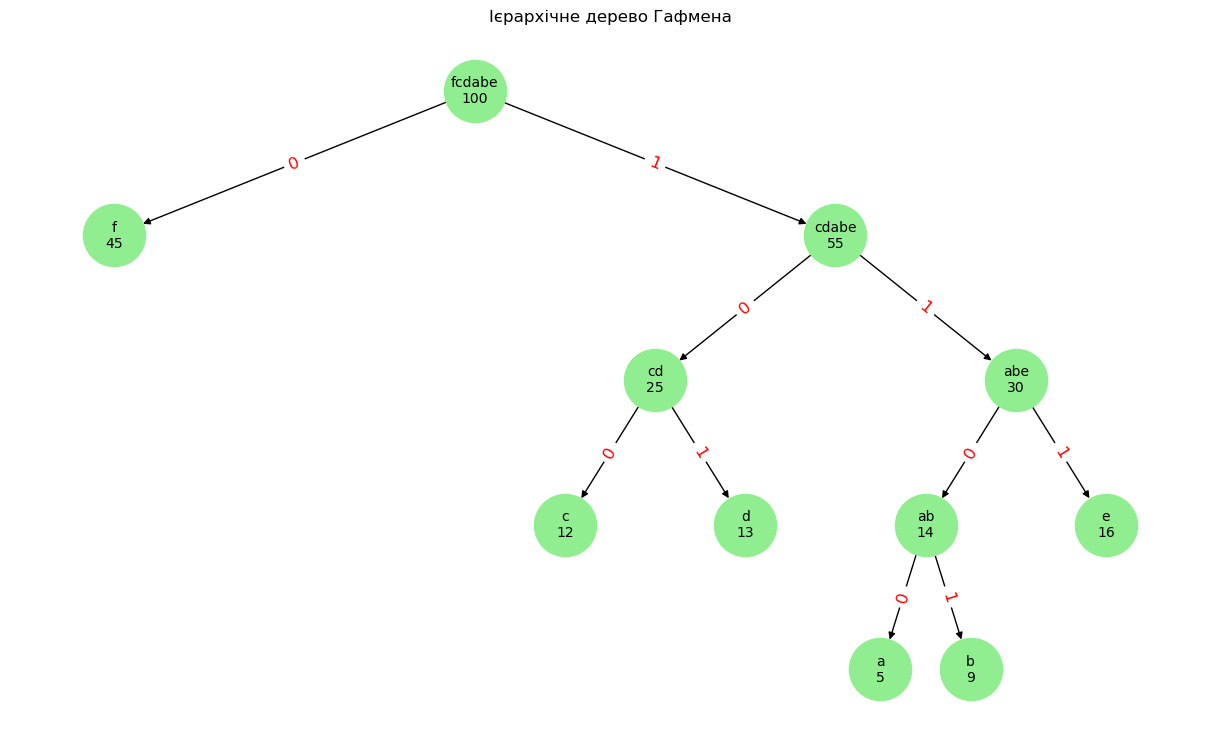

In [2]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(chars, freqs):
    heap = [Node(c, f) for c, f in zip(chars, freqs)]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        new_node = Node(left.char + right.char, left.freq + right.freq)
        new_node.left = left
        new_node.right = right

        heapq.heappush(heap, new_node)

    return heap[0]

def get_huffman_codes(node, prefix='', codebook={}):
    if node:
        if not node.left and not node.right:
            codebook[node.char] = prefix
        get_huffman_codes(node.left, prefix + '0', codebook)
        get_huffman_codes(node.right, prefix + '1', codebook)
    return codebook

# Побудова дерева
chars = ['a', 'b', 'c', 'd', 'e', 'f']
freqs = [5, 9, 12, 13, 16, 45]

root = build_huffman_tree(chars, freqs)
codes = get_huffman_codes(root)

print("Коди Гафмена:")
for char in codes:
    print(f"{char}: {codes[char]}")

# --------------------------
# Візуалізація з ієрархією
# --------------------------
def plot_huffman_tree(root):
    G = nx.DiGraph()
    labels = {}

    def add_edges(node, pos={}, x=0, y=0, dx=1.0):
        if node:
            node_id = id(node)
            labels[node_id] = f'{node.char}\n{node.freq}'
            pos[node_id] = (x, y)
            if node.left:
                left_id = id(node.left)
                G.add_edge(node_id, left_id, label='0')
                pos = add_edges(node.left, pos, x - dx, y - 1, dx / 2)
            if node.right:
                right_id = id(node.right)
                G.add_edge(node_id, right_id, label='1')
                pos = add_edges(node.right, pos, x + dx, y - 1, dx / 2)
        return pos

    pos = add_edges(root)
    edge_labels = nx.get_edge_attributes(G, 'label')

    plt.figure(figsize=(12, 7))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color="lightgreen", font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
    plt.title("Ієрархічне дерево Гафмена")
    plt.axis('off')
    plt.show()

plot_huffman_tree(root)

# Функція для обчислення chars і freq зі строки

In [3]:
from collections import Counter

def get_chars_and_freqs(message):
    freq = Counter(message)
    chars = list(freq.keys())
    freqs = list(freq.values())
    return chars, freqs

# Example usage:
message = "huffman coding example"
chars, freqs = get_chars_and_freqs(message)
print(chars)
print(freqs)

['h', 'u', 'f', 'm', 'a', 'n', ' ', 'c', 'o', 'd', 'i', 'g', 'e', 'x', 'p', 'l']
[1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1]


# Декодування Гафмена

In [4]:
def huffman_decode(encoded_str, huffman_tree):
    result = ""
    node = huffman_tree
    for bit in encoded_str:
        node = node.left if bit == '0' else node.right
        if not node.left and not node.right:
            result += node.char
            node = huffman_tree
    return result

# Example encoded string using earlier tree (manually encoded for demonstration)
encoded = ''.join([codes[c] for c in "face"])
decoded = huffman_decode(encoded, root)
print("Decoded:", decoded)

Decoded: face


# контрольні запитання

# Жадібні алгоритми:
* алгоритми, що на кожному кроці приймають локально оптимальне рішення, сподіваючись отримати глобальний оптимум.
# Префіксний код:
* жоден код не є префіксом іншого. У кодуванні Гафмена використовуються саме префіксні коди.
# Купа та черга з пріоритетом:
* купа (heap) реалізує чергу з пріоритетом, дозволяючи швидкий доступ до мінімального (або максимального) елемента.
# Стиснення даних:
* метод зменшення розміру даних. Використовується для збереження місця та прискорення передачі. Переваги: ефективність, швидкість обробки.
# Кроки Гафмена:
* Обчислити частоти
* Побудувати дерево
* Призначити коди
* Закодувати
* Зберегти дерево/коди для декодування
# Недоліки:
* Не оптимальний для невеликих або дуже змінних текстів
* Не працює на потоках
# Альтернативи:
* арифметичне кодування, LZW, BWT
# Практичні застосування: 
* JPEG, MP3, GZIP, PNG, архіватори ZIP

# Висновок

# У ході виконання лабораторної роботи №10 було розглянуто та реалізовано алгоритм кодування Гафмена